In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
# df2019 = pd.read_csv('/Users/hernando/Desktop/quant/assignment4/LoanStats_securev1_2019Q1.csv',low_memory=False,skiprows=1)
df2012 = pd.read_csv('/Users/hernando/Desktop/quant/assignment4/LoanStats3b_securev1.csv',low_memory=False,skiprows=1)
# df2014 = pd.read_csv('/Users/hernando/Desktop/quant/assignment4/LoanStats3c_securev1.csv',low_memory=False,skiprows=1)



In [3]:
df2012.shape

(188183, 150)

In [4]:
dataset = df2012.copy()        #removing empty columns
dataset = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
dataset = dataset.replace({"loan_status": di})

In [5]:
dataset['loan_status'].value_counts()
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (188181, 150)


In [6]:
all_data_na = (dataset.isnull().sum() / len(dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [7]:
missing_data[missing_data['Missing Ratio']==100].index

Index(['member_id', 'open_il_12m', 'sec_app_open_acc', 'sec_app_mort_acc',
       'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line',
       'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint',
       'open_acc_6m', 'open_act_il', 'open_il_24m', 'sec_app_open_act_il',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'sec_app_revol_util', 'sec_app_num_rev_accts', 'inq_last_12m',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'next_pymnt_d',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'sec_app_chargeoff_within_12_mths'],
      dtype='object')

In [8]:
dataset.drop(missing_data[missing_data['Missing Ratio']==100].index,axis=1,inplace=True)

In [9]:
dataset=dataset.dropna(thresh = 160000,axis=1) #26000 is minimum number of non-NA values
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (188181, 91)


In [10]:
all_data_na = (dataset.isnull().sum() / len(dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
all_data_na

num_tl_120dpd_2m              14.877698
pct_tl_nvr_dlq                14.822963
mths_since_recent_inq         14.809147
avg_cur_bal                   14.744847
mo_sin_old_rev_tl_op          14.742190
mo_sin_rcnt_rev_tl_op         14.742190
total_il_high_credit_limit    14.741658
num_bc_tl                     14.741658
tot_coll_amt                  14.741658
tot_cur_bal                   14.741658
total_rev_hi_lim              14.741658
mo_sin_rcnt_tl                14.741658
num_actv_bc_tl                14.741658
num_actv_rev_tl               14.741658
num_accts_ever_120_pd         14.741658
num_il_tl                     14.741658
num_tl_90g_dpd_24m            14.741658
num_op_rev_tl                 14.741658
num_rev_accts                 14.741658
tot_hi_cred_lim               14.741658
num_rev_tl_bal_gt_0           14.741658
num_tl_op_past_12m            14.741658
num_tl_30dpd                  14.741658
num_bc_sats                    8.531680
num_sats                       8.531680


In [11]:
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d",'policy_code'] #deleting some more columns
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (188181, 68)


# DataProcessing

In [12]:
Dataset=dataset.copy()
Dataset["emp_length"] = Dataset["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Dataset.loc[Dataset["emp_length"].notnull(), 'emp_length'] = Dataset.loc[Dataset["emp_length"].notnull(), 'emp_length'].apply(int)
print("Current shape of dataset :",Dataset.shape)
Dataset.head()

Current shape of dataset : (188181, 68)


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,url,addr_state,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10129454,12000.0,12000.0,12000.0,10.99%,392.81,B,B2,4,RENT,60000.0,0,https://lendingclub.com/browse/loanDetail.acti...,NC,720.0,724.0,1.0,15.0,0.0,7137.0,24%,18.0,13988.609996,13988.61,12000.0,1988.61,0.0,0.0,3775.55,Aug-2018,569.0,565.0,0.0,Individual,0.0,0.0,7137.0,29700.0,8.0,476.0,15216.0,15.9,48.0,1.0,1.0,0.0,1.0,3.0,4.0,7.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0,N,N
1,10149488,4800.0,4800.0,4800.0,10.99%,157.13,B,B2,2,MORTGAGE,39600.0,0,https://lendingclub.com/browse/loanDetail.acti...,TX,755.0,759.0,2.0,3.0,0.0,4136.0,16.1%,8.0,5157.519457,5157.52,4800.0,357.52,0.0,0.0,3900.48,Jan-2017,534.0,530.0,0.0,Individual,0.0,0.0,4136.0,25700.0,0.0,1379.0,21564.0,16.1,220.0,25.0,25.0,0.0,25.0,3.0,2.0,2.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,100.0,0.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,N,N
2,10149342,27050.0,27050.0,27050.0,10.99%,885.46,B,B2,10,OWN,55000.0,0,https://lendingclub.com/browse/loanDetail.acti...,MI,730.0,734.0,0.0,14.0,0.0,36638.0,61.2%,27.0,31752.530000,31752.53,27050.0,4702.53,0.0,0.0,6074.19,Mar-2020,834.0,830.0,0.0,Individual,0.0,0.0,114834.0,59900.0,3.0,9570.0,16473.0,53.9,326.0,16.0,6.0,4.0,16.0,8.0,2.0,4.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0,N,N
3,10148122,12000.0,12000.0,12000.0,7.62%,373.94,A,A3,3,MORTGAGE,96500.0,0,https://lendingclub.com/browse/loanDetail.acti...,TX,705.0,709.0,0.0,17.0,0.0,13248.0,55.7%,30.0,13397.539998,13397.54,12000.0,1397.54,0.0,0.0,2927.22,May-2020,809.0,805.0,0.0,Individual,0.0,0.0,200314.0,23800.0,4.0,11783.0,2441.0,83.5,118.0,10.0,9.0,1.0,10.0,10.0,4.0,5.0,4.0,10.0,15.0,8.0,14.0,5.0,17.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0,N,N
4,10129477,14000.0,14000.0,14000.0,12.85%,470.71,B,B4,4,RENT,88000.0,0,https://lendingclub.com/browse/loanDetail.acti...,NC,670.0,674.0,0.0,6.0,1.0,3686.0,81.9%,14.0,16945.318783,16945.32,14000.0,2945.32,0.0,0.0,470.47,May-2020,569.0,565.0,0.0,Individual,0.0,0.0,17672.0,4500.0,3.0,2945.0,480.0,87.7,103.0,24.0,13.0,0.0,38.0,NaN,3.0,4.0,3.0,9.0,3.0,4.0,10.0,4.0,6.0,0.0,78.6,100.0,1.0,0.0,31840.0,17672.0,3900.0,27340.0,N,N


In [13]:
Dataset.drop(['id','url','last_credit_pull_d','addr_state','sub_grade','application_type','hardship_flag','debt_settlement_flag'],axis=1,inplace=True)

In [14]:
Dataset["int_rate"] = Dataset["int_rate"].apply(lambda x: float(str(x).split('%',1)[0]))
Dataset["revol_util"] = Dataset["revol_util"].apply(lambda x: float(str(x).split('%',1)[0]))

In [15]:
Dataset['grade'] = Dataset['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Dataset["home_ownership"] = Dataset["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [16]:
Dataset["emp_length"] = Dataset["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Dataset.loc[Dataset["emp_length"].notnull(), 'emp_length'] = Dataset.loc[Dataset["emp_length"].notnull(), 'emp_length'].apply(int)
print("Current shape of dataset :",Dataset.shape)

Current shape of dataset : (188181, 60)


In [17]:
Dataset.fillna(Dataset.mean(),inplace = True)

In [341]:
columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
        'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit','loan_status']

In [342]:
data_clean = Dataset[columns]
# data_clean['loan_status'] = Dataset['loan_status']
# data_clean['loan_status'].value_counts()

In [343]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=10000)
subset_of_loanstatus_1 = loanstatus_1.sample(n=10000)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (20000, 60)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,9000.0,9000.0,9000.0,6.03,273.92,7,6.163899,4,32170.0,725.0,729.0,0.0,10.0,0.0,3725.0,5.9,29.0,9861.111782,9861.11,9000.00,861.11,0.00,0.0000,273.91,754.0,750.0,0.0,0.0,0.000000,3725.000000,63000.000000,2.0,414.000000,42706.0,6.1,386.000000,13.000000,13.000000,1.0,56.0,6.99123,2.000000,4.000000,3.00000,10.000000,3.000000,10.000000,25.000000,4.000000,10.000000,0.000000,96.000000,0.0,0.0,0.0,63000.000000,3725.0,45500.0,0.000000,0
1,33425.0,33425.0,33150.0,16.29,818.00,5,10.000000,5,75000.0,715.0,719.0,0.0,13.0,0.0,37446.0,81.9,31.0,44614.210072,44247.15,33425.00,11189.21,0.00,0.0000,20895.48,809.0,805.0,0.0,0.0,0.000000,56343.000000,45700.000000,2.0,4334.000000,7023.0,83.9,181.000000,19.000000,19.000000,0.0,19.0,20.00000,6.000000,7.000000,7.00000,13.000000,13.000000,8.000000,17.000000,7.000000,13.000000,0.000000,100.000000,71.4,0.0,0.0,78231.000000,56343.0,43700.0,32531.000000,0
2,9500.0,9500.0,9500.0,13.67,323.17,6,9.000000,6,32000.0,695.0,699.0,2.0,6.0,0.0,3007.0,44.2,38.0,2594.020000,2594.02,1703.09,889.09,1.84,0.0000,330.00,509.0,505.0,0.0,0.0,76.736188,137324.135509,29891.601209,9.0,13796.105776,793.0,79.1,178.488491,14.108459,8.938581,2.0,5.0,0.00000,3.755192,5.675374,4.66582,9.018979,7.726427,8.094459,14.950405,5.693393,11.085368,1.788014,95.399571,50.0,0.0,0.0,165545.309156,10792.0,3800.0,34389.556102,1
3,10000.0,10000.0,9975.0,18.49,363.99,4,5.000000,5,45000.0,670.0,674.0,2.0,10.0,0.0,5928.0,39.5,13.0,10353.620000,10327.81,5151.20,2480.99,2721.43,489.8574,363.99,589.0,585.0,0.0,0.0,0.000000,17657.000000,15000.000000,7.0,1962.000000,1707.0,67.2,96.000000,7.000000,2.000000,0.0,7.0,3.00000,2.000000,5.000000,4.00000,4.000000,4.000000,8.000000,9.000000,5.000000,10.000000,3.000000,84.000000,66.7,0.0,0.0,36852.000000,17657.0,5200.0,21852.000000,1
4,17475.0,17475.0,17450.0,22.47,487.33,3,9.000000,5,35000.0,660.0,664.0,1.0,16.0,0.0,10934.0,52.0,43.0,9746.600000,9732.77,3834.07,5894.10,18.43,0.0000,487.33,604.0,600.0,0.0,0.0,76.736188,137324.135509,29891.601209,5.0,13796.105776,6600.0,60.2,178.488491,14.108459,8.938581,0.0,7.0,2.00000,3.755192,5.675374,8.00000,9.018979,7.726427,8.094459,14.950405,5.693393,16.000000,1.788014,95.399571,37.5,0.0,0.0,165545.309156,10934.0,16600.0,34389.556102,1


In [211]:
data_clean.to_csv('raw.csv',index=False)

In [23]:
plt.style.use('seaborn-darkgrid')

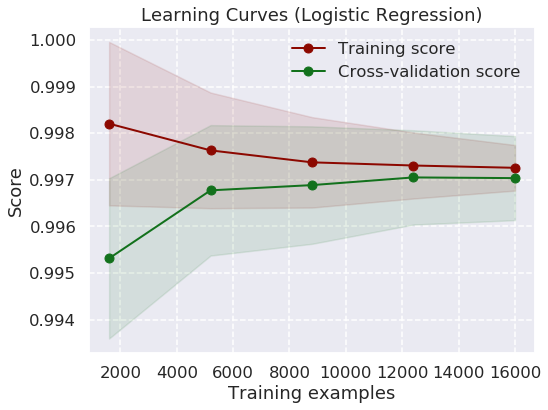

In [344]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.savefig('Learning.jpg',dpi=200)
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

In [189]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = data_clean.iloc[:,:-1]
y = data_clean.iloc[:,-1]


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.2, 
                       threshold_out = 0.25, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    p_value = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            p_value.append((best_feature,best_pval))
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included,p_value

result,p_value = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  last_fico_range_low            with p-value 0.0
Add  recoveries                     with p-value 0.0
Add  total_pymnt                    with p-value 0.0
Add  funded_amnt                    with p-value 0.0
Add  total_rec_int                  with p-value 0.0
Add  last_fico_range_high           with p-value 8.29608e-282
Add  last_pymnt_amnt                with p-value 3.55064e-38
Add  collection_recovery_fee        with p-value 6.34531e-25
Drop recoveries                     with p-value 0.698401
Add  grade                          with p-value 3.59098e-13
Add  installment                    with p-value 6.66988e-17
Add  num_op_rev_tl                  with p-value 3.65012e-08
Add  funded_amnt_inv                with p-value 8.48432e-05
Add  total_rev_hi_lim               with p-value 0.000100119
Add  annual_inc                     with p-value 5.06904e-05
Add  num_rev_tl_bal_gt_0            with p-value 0.00255655
Add  pct_tl_nvr_dlq                 with p-value 0.00431456
Add  mt

In [181]:
data_clean.columns[:30]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal'],
      dtype='object')

In [345]:
steppp=[]
from patsy import dmatrices
import statsmodels.api as sm 
for i in data_clean.columns[:-1]:
    if i=='collection_recovery_fee' or i =='acc_open_past_24mths':
        continue
    else:
        print(i)
        y, X = dmatrices( 'loan_status ~'+i, data=data_clean, return_type='dataframe')
        mod = sm.Logit(y, X)
        res = mod.fit()
        steppp.append((i,res.pvalues[1]))

loan_amnt
Optimization terminated successfully.
         Current function value: 0.690963
         Iterations 4
funded_amnt
Optimization terminated successfully.
         Current function value: 0.690966
         Iterations 4
funded_amnt_inv
Optimization terminated successfully.
         Current function value: 0.690967
         Iterations 4
int_rate
Optimization terminated successfully.
         Current function value: 0.650406
         Iterations 5
installment
Optimization terminated successfully.
         Current function value: 0.692087
         Iterations 3
grade
Optimization terminated successfully.
         Current function value: 0.654227
         Iterations 5
emp_length
Optimization terminated successfully.
         Current function value: 0.693116
         Iterations 3
home_ownership
Optimization terminated successfully.
         Current function value: 0.692049
         Iterations 4
annual_inc
Optimization terminated successfully.
         Current function value: 0.689438
  

/Users/hernando/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.483549
         Iterations 9
last_fico_range_high
Optimization terminated successfully.
         Current function value: 0.443756
         Iterations 7
last_fico_range_low
Optimization terminated successfully.
         Current function value: 0.486004
         Iterations 7
collections_12_mths_ex_med
Optimization terminated successfully.
         Current function value: 0.693140
         Iterations 3
acc_now_delinq
Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3
tot_coll_amt
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
tot_cur_bal
Optimization terminated successfully.
         Current function value: 0.690049
         Iterations 4
total_rev_hi_lim
Optimization terminated successfully.
         Current function value: 0.691385
         Iterations 6
avg_cur_bal
Optimization terminated successfully.
         

In [346]:
value1=[round(steppp[i][1],4)for i in range(len(steppp))]
ccc=[steppp[i][0]for i in range(len(steppp))]
ivframe=pd.DataFrame(columns=('Feature','Pvalue'))
ivframe['Feature']=ccc
ivframe['Pvalue']=value1
finalfeature=ivframe[ivframe['Pvalue']<0.2]
finalfeature
# trans=finalfeature.T
# trans.drop(20,axis=1,inplace=True)
# trans

,Feature,Pvalue
0,loan_amnt,0.0000
1,funded_amnt,0.0000
2,funded_amnt_inv,0.0000
3,int_rate,0.0000
4,installment,0.0000
5,grade,0.0000
7,home_ownership,0.0000
8,annual_inc,0.0000
9,fico_range_low,0.0000
10,fico_range_high,0.0000


In [196]:
ivvv=list(finalfeature.Feature.values)
ivvv.append('loan_status')

In [209]:
aftter = data_clean[ivvv]
aftter.to_csv('after_step.csv',index=False)

In [187]:
z='loan_amnt'
for i in kkk[:-1]:
    z=z+'+'+i
    
zzz= data_clean[kkk]
y, X = dmatrices( 'loan_status ~'+z, data=zzz, return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
res.summary()

'loan_amnt+loan_amnt+funded_amnt+funded_amnt_inv+int_rate+installment+grade+home_ownership+annual_inc+fico_range_low+fico_range_high+inq_last_6mths+open_acc+pub_rec+revol_bal+revol_util+total_pymnt+total_pymnt_inv+total_rec_prncp+total_rec_int+last_pymnt_amnt+last_fico_range_high'

In [126]:
result =['last_fico_range_low', 'total_pymnt', 'funded_amnt', 'total_rec_int', 
         'last_fico_range_high', 'last_pymnt_amnt', 'collection_recovery_fee', 'grade', 'installment', 'num_op_rev_tl', 'funded_amnt_inv', 'total_rev_hi_lim', 'annual_inc', 'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq', 'mths_since_recent_inq', 'home_ownership', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'total_rec_prncp', 'recoveries', 'total_pymnt_inv', 'total_acc', 'tot_coll_amt', 'num_actv_rev_tl', 'bc_open_to_buy', 'int_rate', 'collections_12_mths_ex_med']





In [127]:
result.append('loan_status')
result_select = data_clean[result]

In [129]:
result_select.to_csv('whaterver.csv',index=False)

# IV

In [29]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [198]:
dataiv=data_clean[ivvv]

In [347]:
list1=[]
for col in dataiv.columns:
    if col == 'loan_status': break
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(dataiv, col, 'loan_status')
        list1.append((col,iv))
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: loan_amnt
     All  Bad  Good    Value  Distr_Good  Distr_Bad       WoE        IV
177    8    7     1  17800.0      0.0002     0.0014 -1.945910  0.002335
339    8    7     1  28100.0      0.0002     0.0014 -1.945910  0.002335
312    7    6     1   8975.0      0.0002     0.0012 -1.791759  0.001792
387    7    6     1  13150.0      0.0002     0.0012 -1.791759  0.001792
75     7    6     1   9325.0      0.0002     0.0012 -1.791759  0.001792
159   14   12     2  19425.0      0.0004     0.0024 -1.791759  0.003584
212   18   15     3  27575.0      0.0006     0.0030 -1.609438  0.003863
589    6    5     1  28200.0      0.0002     0.0010 -1.609438  0.001288
397   12   10     2  18400.0      0.0004     0.0020 -1.609438  0.002575
90     6    5     1  29000.0      0.0002     0.0010 -1.609438  0.001288
367    6    5     1   9700.0      0.0002     0.0010 -1.609438  0.001288
61     5    4     1   4250.0      0.0002     0.0008 -1.386294  0.000832
132    5    4     1  34475.0   

     All  Bad  Good    Value  Distr_Good  Distr_Bad       WoE        IV
194   10    9     1  19425.0      0.0002     0.0018 -2.197225  0.003516
382    7    6     1   7925.0      0.0002     0.0012 -1.791759  0.001792
378    7    6     1  27300.0      0.0002     0.0012 -1.791759  0.001792
203    7    6     1  13750.0      0.0002     0.0012 -1.791759  0.001792
85     7    6     1   9325.0      0.0002     0.0012 -1.791759  0.001792
794    6    5     1  28200.0      0.0002     0.0010 -1.609438  0.001288
534    6    5     1   5950.0      0.0002     0.0010 -1.609438  0.001288
407    6    5     1  18975.0      0.0002     0.0010 -1.609438  0.001288
276    6    5     1  15350.0      0.0002     0.0010 -1.609438  0.001288
473    6    5     1   9700.0      0.0002     0.0010 -1.609438  0.001288
748    5    4     1  21350.0      0.0002     0.0008 -1.386294  0.000832
70     5    4     1   4250.0      0.0002     0.0008 -1.386294  0.000832
161    5    4     1  12875.0      0.0002     0.0008 -1.386294  0

      All  Bad  Good    Value  Distr_Good  Distr_Bad       WoE        IV
206     8    7     1   526.77      0.0002     0.0014 -1.945910  0.002335
1186    8    7     1   363.82      0.0002     0.0014 -1.945910  0.002335
1104    8    7     1   282.41      0.0002     0.0014 -1.945910  0.002335
1488    7    6     1   482.23      0.0002     0.0012 -1.791759  0.001792
489     7    6     1   426.52      0.0002     0.0012 -1.791759  0.001792
647     7    6     1   576.60      0.0002     0.0012 -1.791759  0.001792
216     7    6     1   252.43      0.0002     0.0012 -1.791759  0.001792
280     6    5     1   343.24      0.0002     0.0010 -1.609438  0.001288
44      6    5     1   349.65      0.0002     0.0010 -1.609438  0.001288
238     6    5     1   875.28      0.0002     0.0010 -1.609438  0.001288
396     6    5     1   436.79      0.0002     0.0010 -1.609438  0.001288
488     6    5     1   292.24      0.0002     0.0010 -1.609438  0.001288
1213    6    5     1   264.00      0.0002     0.001

    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
6   734  470   264  664.0      0.0528     0.0940 -0.576784  0.023763
7   819  486   333  669.0      0.0666     0.0972 -0.378066  0.011569
8   853  503   350  674.0      0.0700     0.1006 -0.362657  0.011097
5   826  467   359  679.0      0.0718     0.0934 -0.263007  0.005681
1   860  457   403  684.0      0.0806     0.0914 -0.125747  0.001358
3   724  370   354  699.0      0.0708     0.0740 -0.044206  0.000141
13  779  393   386  689.0      0.0772     0.0786 -0.017972  0.000025
36    3    0     3  850.0      0.0006     0.0000  0.000000  0.000000
34    3    0     3  834.0      0.0006     0.0000  0.000000  0.000000
31    6    0     6  829.0      0.0012     0.0000  0.000000  0.000000
30    6    0     6  824.0      0.0012     0.0000  0.000000  0.000000
35    2    1     1  844.0      0.0002     0.0002  0.000000  0.000000
2   782  382   400  694.0      0.0800     0.0764  0.046044  0.000166
11  527  243   284  709.0      0.0

     All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
98    13   12     1   95.4      0.0002     0.0024 -2.484907  0.005467
345   12   11     1   81.7      0.0002     0.0022 -2.397895  0.004796
518   11   10     1   71.9      0.0002     0.0020 -2.302585  0.004145
419   10    9     1   93.4      0.0002     0.0018 -2.197225  0.003516
396    7    6     1   69.1      0.0002     0.0012 -1.791759  0.001792
746    7    6     1   87.8      0.0002     0.0012 -1.791759  0.001792
604   13   11     2   89.6      0.0004     0.0022 -1.704748  0.003069
811    6    5     1   24.9      0.0002     0.0010 -1.609438  0.001288
306    6    5     1   25.5      0.0002     0.0010 -1.609438  0.001288
315    6    5     1   90.9      0.0002     0.0010 -1.609438  0.001288
153    6    5     1   97.9      0.0002     0.0010 -1.609438  0.001288
460    6    5     1   18.5      0.0002     0.0010 -1.609438  0.001288
749   11    9     2   55.5      0.0004     0.0018 -1.504077  0.002106
4     16   13     3 

      All  Bad  Good     Value  Distr_Good  Distr_Bad       WoE        IV
0       1    1     0  11930.45      0.0000     0.0002  0.000000 -0.000000
6454    1    0     1  10610.84      0.0002     0.0000  0.000000  0.000000
6455    1    1     0  12903.35      0.0000     0.0002  0.000000 -0.000000
6456    1    1     0  14960.16      0.0000     0.0002  0.000000 -0.000000
6457    1    0     1  17906.81      0.0002     0.0000  0.000000  0.000000
6458    1    1     0  14708.91      0.0000     0.0002  0.000000 -0.000000
6459    1    1     0   4411.83      0.0000     0.0002  0.000000 -0.000000
6453    1    0     1  17924.47      0.0002     0.0000  0.000000  0.000000
6460    1    0     1  44251.06      0.0002     0.0000  0.000000  0.000000
6462    1    0     1  34170.38      0.0002     0.0000  0.000000  0.000000
6463    1    0     1  16378.42      0.0002     0.0000  0.000000  0.000000
6464    1    1     0   4147.71      0.0000     0.0002  0.000000 -0.000000
6465    1    0     1  14555.98      0.

      All  Bad  Good     Value  Distr_Good  Distr_Bad       WoE        IV
8421    3    2     1    261.87      0.0002     0.0004 -0.693147  0.000139
4861    3    2     1   1338.67      0.0002     0.0004 -0.693147  0.000139
6354    1    0     1   2551.61      0.0002     0.0000  0.000000  0.000000
6355    1    0     1    721.66      0.0002     0.0000  0.000000  0.000000
6356    1    1     0    993.04      0.0000     0.0002  0.000000 -0.000000
6357    1    1     0   3418.73      0.0000     0.0002  0.000000 -0.000000
6358    1    0     1   5168.98      0.0002     0.0000  0.000000  0.000000
6359    1    0     1   2429.59      0.0002     0.0000  0.000000  0.000000
6360    1    1     0    177.61      0.0000     0.0002  0.000000 -0.000000
6361    1    1     0   6214.43      0.0000     0.0002  0.000000 -0.000000
6363    1    1     0   1836.46      0.0000     0.0002  0.000000 -0.000000
6364    1    1     0   1712.92      0.0000     0.0002  0.000000 -0.000000
6365    1    1     0   5421.99      0.

    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
0   470  436    34  499.0      0.0068     0.0872 -2.551282  0.205123
42  143  132    11  514.0      0.0022     0.0264 -2.484907  0.060135
40  116  107     9  509.0      0.0018     0.0214 -2.475604  0.048522
50  126  114    12  524.0      0.0024     0.0228 -2.251292  0.045926
4   128  115    13  529.0      0.0026     0.0230 -2.179983  0.044472
61  121  105    16  534.0      0.0032     0.0210 -1.881372  0.033488
57  123  106    17  519.0      0.0034     0.0212 -1.830226  0.032578
31  115   99    16  504.0      0.0032     0.0198 -1.822531  0.030254
9   149  124    25  579.0      0.0050     0.0248 -1.601406  0.031708
8   162  134    28  544.0      0.0056     0.0268 -1.565635  0.033191
18  200  165    35  604.0      0.0070     0.0330 -1.550597  0.040316
15  125  103    22  554.0      0.0044     0.0206 -1.543687  0.025008
6   123  101    22  539.0      0.0044     0.0202 -1.524078  0.024080
27  184  150    34  594.0      0.0

       All  Bad  Good          Value  Distr_Good  Distr_Bad       WoE  \
0     1588  831   757  137324.135509      0.1514     0.1662 -0.093267   
5499     1    0     1   10610.000000      0.0002     0.0000  0.000000   
5498     1    1     0  414668.000000      0.0000     0.0002  0.000000   
5497     1    1     0  143385.000000      0.0000     0.0002  0.000000   
5496     1    0     1  155114.000000      0.0002     0.0000  0.000000   
5495     1    0     1   55734.000000      0.0002     0.0000  0.000000   
5494     1    1     0  260930.000000      0.0000     0.0002  0.000000   
5493     1    1     0    1083.000000      0.0000     0.0002  0.000000   
5492     1    1     0  771412.000000      0.0000     0.0002  0.000000   
5491     1    0     1  210155.000000      0.0002     0.0000  0.000000   
5490     1    0     1  276303.000000      0.0002     0.0000  0.000000   
5489     1    0     1  112538.000000      0.0002     0.0000  0.000000   
5488     1    1     0  300040.000000      0.0000   

      All  Bad  Good   Value  Distr_Good  Distr_Bad       WoE        IV
499     5    4     1  1346.0      0.0002     0.0008 -1.386294  0.000832
1743    4    3     1  7319.0      0.0002     0.0006 -1.098612  0.000439
1011    4    3     1  1157.0      0.0002     0.0006 -1.098612  0.000439
1764    4    3     1  2242.0      0.0002     0.0006 -1.098612  0.000439
822     4    3     1  2024.0      0.0002     0.0006 -1.098612  0.000439
514     4    3     1  3454.0      0.0002     0.0006 -1.098612  0.000439
1942    4    3     1  5936.0      0.0002     0.0006 -1.098612  0.000439
1302    4    3     1  2840.0      0.0002     0.0006 -1.098612  0.000439
4557    4    3     1  6435.0      0.0002     0.0006 -1.098612  0.000439
594     4    3     1  3482.0      0.0002     0.0006 -1.098612  0.000439
1081    4    3     1  2748.0      0.0002     0.0006 -1.098612  0.000439
537     4    3     1  1948.0      0.0002     0.0006 -1.098612  0.000439
866     3    2     1  7090.0      0.0002     0.0004 -0.693147  0

     All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
523   13   12     1  100.4      0.0002     0.0024 -2.484907  0.005467
300    9    8     1   47.6      0.0002     0.0016 -2.079442  0.002911
419    8    7     1  101.3      0.0002     0.0014 -1.945910  0.002335
44     7    6     1   52.2      0.0002     0.0012 -1.791759  0.001792
350    7    6     1   77.6      0.0002     0.0012 -1.791759  0.001792
429   20   17     3   98.7      0.0006     0.0034 -1.734601  0.004857
461   13   11     2   74.3      0.0004     0.0022 -1.704748  0.003069
721   13   11     2   81.7      0.0004     0.0022 -1.704748  0.003069
280    6    5     1   57.1      0.0002     0.0010 -1.609438  0.001288
875    6    5     1    1.8      0.0002     0.0010 -1.609438  0.001288
892    6    5     1   66.9      0.0002     0.0010 -1.609438  0.001288
895    6    5     1   36.0      0.0002     0.0010 -1.609438  0.001288
218    6    5     1   69.1      0.0002     0.0010 -1.609438  0.001288
666    6    5     1 

      All  Bad  Good       Value  Distr_Good  Distr_Bad       WoE        IV
41      9    8     1   70.000000      0.0002     0.0016 -2.079442  0.002911
81      4    3     1   77.000000      0.0002     0.0006 -1.098612  0.000439
67      6    4     2   79.000000      0.0004     0.0008 -0.693147  0.000277
80      6    4     2   74.000000      0.0004     0.0008 -0.693147  0.000277
87      6    4     2   78.000000      0.0004     0.0008 -0.693147  0.000277
93      3    2     1   85.000000      0.0002     0.0004 -0.693147  0.000139
59     19   12     7   37.000000      0.0014     0.0024 -0.538997  0.000539
3     569  320   249    1.000000      0.0498     0.0640 -0.250868  0.003562
33      9    5     4   69.000000      0.0008     0.0010 -0.223144  0.000045
25     18   10     8   47.000000      0.0016     0.0020 -0.223144  0.000089
11    534  294   240    4.000000      0.0480     0.0588 -0.202941  0.002192
61     11    6     5   56.000000      0.0010     0.0012 -0.182322  0.000036
28     46   

     All  Bad  Good     Value  Distr_Good  Distr_Bad       WoE        IV
163    4    3     1  106.0000      0.0002     0.0006 -1.098612  0.000439
106   17   12     5   80.0000      0.0010     0.0024 -0.875469  0.001226
92    20   13     7   77.0000      0.0014     0.0026 -0.619039  0.000743
128   13    8     5   91.0000      0.0010     0.0016 -0.470004  0.000282
11   340  209   131    1.0000      0.0262     0.0418 -0.467137  0.007287
56    33   20    13   70.0000      0.0026     0.0040 -0.430783  0.000603
53     5    3     2  137.0000      0.0004     0.0006 -0.405465  0.000081
0    484  283   201    2.0000      0.0402     0.0566 -0.342142  0.005611
80    66   38    28    0.0000      0.0056     0.0076 -0.305382  0.000611
59    37   21    16   46.0000      0.0032     0.0042 -0.271934  0.000272
14   436  247   189    3.0000      0.0378     0.0494 -0.267641  0.003105
60    39   22    17   43.0000      0.0034     0.0044 -0.257829  0.000258
17   382  213   169    4.0000      0.0338     0.042

     All  Bad  Good     Value  Distr_Good  Distr_Bad       WoE        IV
19     3    2     1  16.00000      0.0002     0.0004 -0.693147  0.000139
13    30   19    11  13.00000      0.0022     0.0038 -0.546544  0.000874
11   110   63    47  11.00000      0.0094     0.0126 -0.292987  0.000938
2    278  155   123   9.00000      0.0246     0.0310 -0.231241  0.001480
12    74   40    34  12.00000      0.0068     0.0080 -0.162519  0.000195
0    658  347   311   7.00000      0.0622     0.0694 -0.109532  0.000789
9    439  231   208   1.00000      0.0416     0.0462 -0.104880  0.000482
14   162   85    77  10.00000      0.0154     0.0170 -0.098846  0.000158
16    23   12    11  14.00000      0.0022     0.0024 -0.087011  0.000017
5    878  450   428   4.66582      0.0856     0.0900 -0.050124  0.000221
6    417  212   205   8.00000      0.0410     0.0424 -0.033576  0.000047
7   1695  861   834   4.00000      0.1668     0.1722 -0.031861  0.000172
15     4    2     2  17.00000      0.0004     0.000

     All   Bad  Good      Value  Distr_Good  Distr_Bad       WoE        IV
10    14     9     5   9.000000      0.0010     0.0018 -0.587787  0.000470
9     47    30    17   7.000000      0.0034     0.0060 -0.567984  0.001477
4    241   150    91   5.000000      0.0182     0.0300 -0.499776  0.005897
7   1349   764   585   3.000000      0.1170     0.1528 -0.266956  0.009557
1    713   400   313   4.000000      0.0626     0.0800 -0.245261  0.004268
6     99    54    45   6.000000      0.0090     0.0108 -0.182322  0.000328
11    24    13    11   8.000000      0.0022     0.0026 -0.167054  0.000067
0   1588   831   757   1.788014      0.1514     0.1662 -0.093267  0.001380
5   1987   999   988   2.000000      0.1976     0.1998 -0.011072  0.000024
14     1     0     1  11.000000      0.0002     0.0000  0.000000  0.000000
13     1     0     1  12.000000      0.0002     0.0000  0.000000  0.000000
12     1     1     0  17.000000      0.0000     0.0002  0.000000 -0.000000
8      2     1     1  14.

      All  Bad  Good          Value  Distr_Good  Distr_Bad       WoE        IV
1348    4    3     1    6991.000000      0.0002     0.0006 -1.098612  0.000439
1494    3    2     1   32502.000000      0.0002     0.0004 -0.693147  0.000139
1858    3    2     1   39410.000000      0.0002     0.0004 -0.693147  0.000139
2399    3    2     1   32711.000000      0.0002     0.0004 -0.693147  0.000139
2042    3    2     1   42632.000000      0.0002     0.0004 -0.693147  0.000139
1366    3    2     1   29573.000000      0.0002     0.0004 -0.693147  0.000139
5346    3    2     1   38980.000000      0.0002     0.0004 -0.693147  0.000139
11    412  226   186   42883.773037      0.0372     0.0452 -0.194788  0.001558
6021    1    1     0  107739.000000      0.0000     0.0002  0.000000 -0.000000
6022    1    0     1   37453.000000      0.0002     0.0000  0.000000  0.000000
6023    1    1     0   12192.000000      0.0000     0.0002  0.000000 -0.000000
6024    1    0     1   54313.000000      0.0002     

In [399]:
value1=[round(list1[i][1],4)for i in range(len(list1))]
ivframe=pd.DataFrame(columns=('Fea','Iv'))
ivframe['Fea']=dataiv.columns[:-1]
ivframe['Iv']=value1
finalfeature=ivframe[ivframe['Iv']>0.15]
finalfeature
trans=finalfeature.T
# trans.drop(0,axis=1,inplace=True)
# trans.drop(2,axis=1,inplace=True)
# trans.drop(14,axis=1,inplace=True)
# trans.drop(26,axis=1,inplace=True)
# trans.drop(43,axis=1,inplace=True)
trans

,0,1,2,3,4,5,14,20,21,23,26,43
Fea,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,revol_util,last_fico_range_high,last_fico_range_low,total_rev_hi_lim,bc_util,total_bc_limit
Iv,0.1984,0.1991,0.2104,0.4137,0.2943,0.3401,0.3581,2.5894,2.5844,0.2126,0.3657,0.1799


In [349]:
kkk=list(finalfeature.Feature.values)
kkk.append('loan_status')
zzz = data_clean[kkk]

In [351]:
zzz.to_csv('afteriv.csv',index=False)

In [238]:



# z='loan_amnt'
# for i in kkk:
#     z=z+'+'+i
    
# c= data_clean[kkk]
# y, X = dmatrices( 'loan_status ~'+z, data=zzz, return_type='dataframe')
# mod = sm.Logit(y, X)
# res = mod.fit()
# res.summary()

In [400]:
before=data_clean[['installment','grade','revol_util', 'last_fico_range_low']]

##根据corrlation 删除了关联度大的feature
# 'last_fico_range_low'
# 'funded_amnt_inv
# 'installment'
result_sel['loan_status']=result_select['loan_status']

In [245]:
result_sel = result_select[[ 'funded_amnt', 'last_fico_range_high', 'grade', 'total_rev_hi_lim', 'int_rate','installment','funded_amnt_inv','last_fico_range_low']]
result_sel['loan_status']=result_select['loan_status']

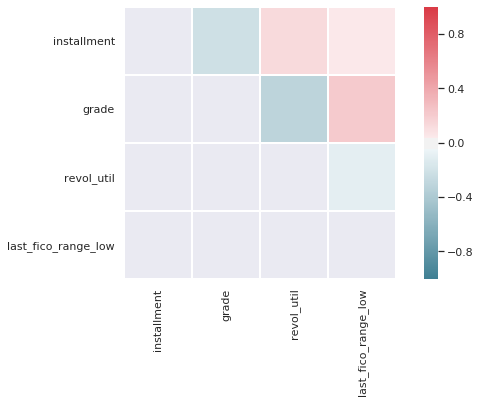

In [404]:
dataViz = before
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,5))
# plt.subplot(1,2,1)
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.yticks(rotation=0)
plt.savefig('after_corr.png',dpi=200,bbox_inches='tight')

In [409]:
after = data_clean[[ 'loan_amnt','funded_amnt_inv','int_rate','installment', 
                       'revol_util','last_fico_range_high','last_fico_range_low']]
# result_sel['loan_status']=result_select['loan_status']

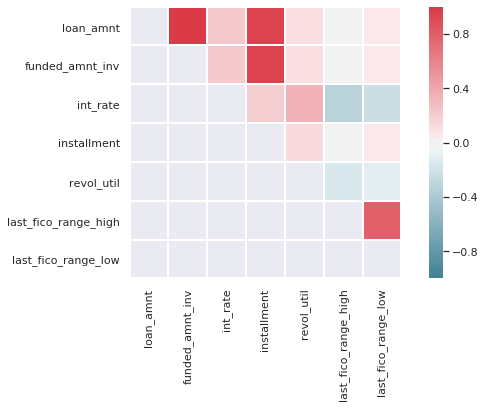

In [410]:
dataViz = after
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,5))
# plt.subplot(1,2,1)
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.savefig('before_corr.png',dpi=200,bbox_inches='tight')

In [239]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = result_sel.iloc[:,:-1]
y = result_sel.iloc[:,-1]


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.2, 
                       threshold_out = 0.25, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    p_value = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            p_value.append((best_feature,best_pval))
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included,p_value

result,p_value = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  last_fico_range_high           with p-value 0.0
Add  grade                          with p-value 3.42024e-31
Add  funded_amnt                    with p-value 7.17112e-17
resulting features:
['last_fico_range_high', 'grade', 'funded_amnt']


In [309]:
# result_select.to_csv('datattttt.csv',index=False)

In [411]:
finalll=['grade','revol_util','last_fico_range_low','installment','loan_status']
# 'funded_amnt','last_fico_range_high'
# 'last_fico_range_low','installment'
result_sel=data_clean[finalll]

In [450]:
logresult_sel=result_sel.copy()
logresult_sel['installment']=np.log(result_sel['installment'])
# logresult_sel['last_fico_range_low']=np.log(result_sel['last_fico_range_low'])

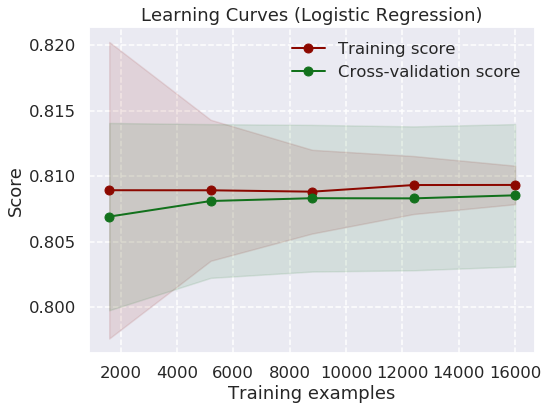

In [435]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
#     plt.savefig('Learning.jpg',dpi=200)
    return plt

X, y = result_sel.iloc[:,:-1].values, result_sel.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2,)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

In [464]:
logresult_sel.to_csv('log.csv',index=False)

In [453]:
X_train, X_test, y_train, y_test = train_test_split(logresult_sel.iloc[:,:-1], logresult_sel.iloc[:,-1], test_size=0.3, random_state=42)


In [442]:
X_train, X_test, y_train, y_test = train_test_split(result_sel.iloc[:,:-1], result_sel.iloc[:,-1], test_size=0.3, random_state=42)


In [454]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=result_sel.iloc[:,:-1].values
    y=result_sel.iloc[:,-1].values
    grid.fit(X,y)
    
    return grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=42)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8095000000000001
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [455]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)

Logistic regression accuracy is  0.8078333333333333


In [456]:
def print_confusion_matrix(predictions, goldlabels):
    '''
    Function that prints out a confusion matrix
    
    :param predictions: predicted labels
    :param goldlabels: gold standard labels
    :type predictions, goldlabels: list of strings
    '''
    
    
    
    #based on example from https://datatofish.com/confusion-matrix-python/ 
    data = {'Gold':    goldlabels, 'Predicted': predictions    }
    df = pd.DataFrame(data, columns=['Gold','Predicted'])

    confusion_matrix = pd.crosstab(df['Gold'], df['Predicted'], rownames=['Gold'], colnames=['Predicted'])
    print (confusion_matrix)


def print_precision_recall_fscore(predictions, goldlabels):
    '''
    Function that prints out precision, recall and f-score
    
    :param predictions: predicted output by classifier
    :param goldlabels: original gold labels
    :type predictions, goldlabels: list of strings
    '''
    
    precision = metrics.precision_score(y_true=goldlabels,
                        y_pred=predictions,average='macro')

    recall = metrics.recall_score(y_true=goldlabels,
                     y_pred=predictions,average='macro')


    fscore = metrics.f1_score(y_true=goldlabels,
                 y_pred=predictions,average='macro')

    print('P:', precision, 'R:', recall, 'F1:', fscore)
    
print_confusion_matrix(y_test,LR_Predict.round())
print_precision_recall_fscore(y_test,LR_Predict.round())

Predicted     0     1
Gold                 
0.0        2390   573
1.0         580  2457
P: 0.8078024469113578 R: 0.8078184892790915 F1: 0.8078093682292774


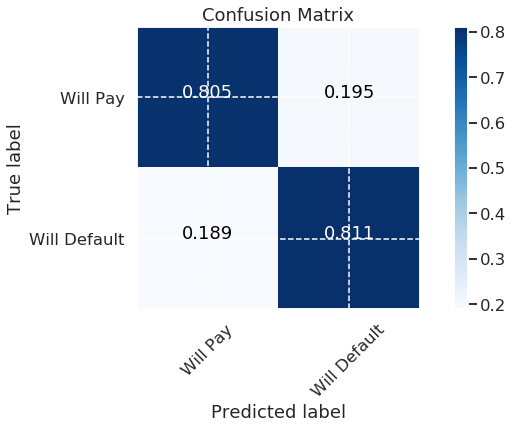

In [458]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.figure(figsize=(10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusematrix.jpg',dpi=200,bbox_inches='tight')
plot_confusion_matrix(LR_Predict_bin, normalize=True)

Logistic regression accuracy is  0.8078333333333333


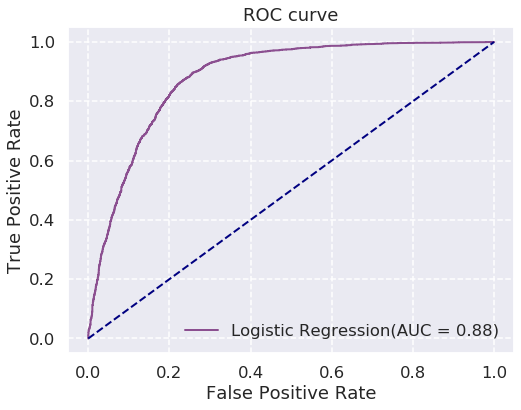

In [457]:
sns.set('talk', 'darkgrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.savefig('ROC.png',dpi=200,bbox_inches='tight')
    
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

# odd

In [612]:
X_train, X_test, y_train, y_test = train_test_split(logresult_sel.iloc[:,:-1], logresult_sel.iloc[:,-1], test_size=0.3, random_state=42)
trainset= X_train.copy()
trainset['loan_status']=y_train
trainset=trainset.reset_index(drop=True)
testset= X_test.copy()
testset['loan_status']=y_test
testset=testset.reset_index(drop=True)

In [632]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm 

y, X = dmatrices( 'loan_status ~  installment + grade + revol_util + last_fico_range_low', data=logresult_sel, return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
print (res.summary())

Optimization terminated successfully.
         Current function value: 0.475164
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19995
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.3145
Time:                        22:12:46   Log-Likelihood:                -9503.3
converged:                       True   LL-Null:                       -13863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.2504      0.261     43.145      0.000      10.739      11.761
in

In [461]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                               5%            95%    Odds Ratio
Intercept            46132.843506  128209.866008  76906.993730
installment              1.276186       1.436364      1.353908
grade                    0.764470       0.810224      0.787015
revol_util               0.993121       0.996440      0.994779
last_fico_range_low      0.981517       0.982610      0.982063


In [574]:
trainset['resid']=res.resid_pearson
remove_train=trainset[abs(trainset['resid']-np.mean(trainset['resid']))>2*np.std(trainset['resid'])].drop('resid',axis=1).reset_index()



count    13928.000000
mean        -1.470070
std         22.310913
min       -590.426825
25%         -0.531569
50%         -0.144197
75%          0.591377
max          6.959263
Name: resid, dtype: float64

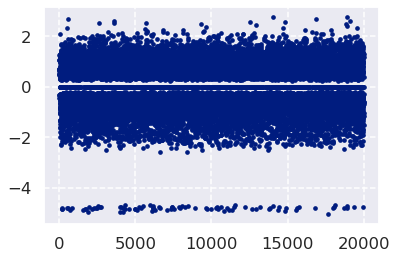

In [634]:
plt.scatter(range(len(res.resid_dev)),res.resid_dev,s=10)

# test

In [718]:
y, X = dmatrices( 'loan_status ~  installment + grade + revol_util + last_fico_range_low', data=testset, return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
print (res.summary())

Optimization terminated successfully.
         Current function value: 0.474721
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5995
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.3151
Time:                        23:34:46   Log-Likelihood:                -2848.3
converged:                       True   LL-Null:                       -4158.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.8706      0.474     22.916      0.000       9.941      11.800
in

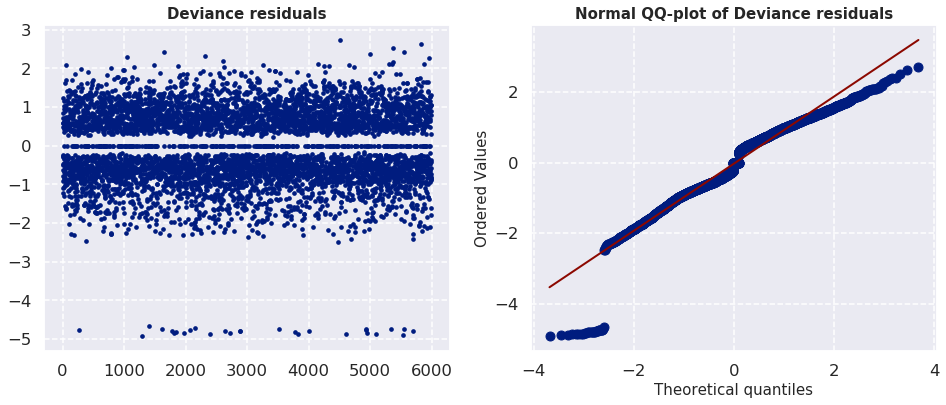

In [672]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(range(len(res.resid_dev)),res.resid_dev,s=10)
plt.title('Deviance residuals',size=15,weight="bold")
ax1 = fig.add_subplot()
plt.subplot(1,2,2)
scipy.stats.probplot(res.resid_dev, dist=scipy.stats.norm, plot=pylab)
ax1.get_lines()[0].set_markeredgecolor ('#6495ED')
ax1.get_lines()[0].set_markerfacecolor('#6495ED')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Normal QQ-plot of Deviance residuals", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
plt.savefig('Before_selection.png',dpi=200,bbox_inches='tight')

(array([ 14.,  24.,  28.,  33.,  26.,  34.,  45.,  26.,  36.,  49.,  50.,
         53.,  49.,  57.,  66.,  76., 108., 143., 178., 222., 251., 316.,
        301., 339., 331., 260.,  17., 282., 358., 305., 257., 199., 166.,
        166., 168., 147., 112., 103.,  85.,  95.,  65.,  55.,  39.,  33.,
         25.,  22.,  17.,  12.,  13.,   5.]),
 array([-2.49299113, -2.39621484, -2.29943855, -2.20266226, -2.10588597,
        -2.00910968, -1.91233339, -1.8155571 , -1.71878081, -1.62200451,
        -1.52522822, -1.42845193, -1.33167564, -1.23489935, -1.13812306,
        -1.04134677, -0.94457048, -0.84779419, -0.7510179 , -0.65424161,
        -0.55746532, -0.46068902, -0.36391273, -0.26713644, -0.17036015,
        -0.07358386,  0.02319243,  0.11996872,  0.21674501,  0.3135213 ,
         0.41029759,  0.50707388,  0.60385017,  0.70062647,  0.79740276,
         0.89417905,  0.99095534,  1.08773163,  1.18450792,  1.28128421,
         1.3780605 ,  1.47483679,  1.57161308,  1.66838937,  1.76516567,
 

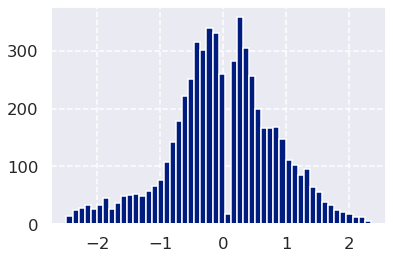

In [669]:
plt.hist(res.resid_dev,bins=50)

In [719]:
testset['resid']=res.resid_dev
remove_test=testset[abs(testset['resid']-np.mean(testset['resid']))<2*np.std(testset['resid'])].drop('resid',axis=1).reset_index()
y, X = dmatrices( 'loan_status ~  installment + grade + revol_util + last_fico_range_low', data=remove_test, return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
print (res.summary())


Optimization terminated successfully.
         Current function value: 0.361488
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 5861
Model:                          Logit   Df Residuals:                     5856
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.4783
Time:                        23:34:50   Log-Likelihood:                -2118.7
converged:                       True   LL-Null:                       -4061.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.2655      0.620     27.834      0.000      16.050      18.481
in

In [720]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                               5%           95%    Odds Ratio
Intercept            9.339157e+06  1.062456e+08  3.149991e+07
installment          1.621697e+00  2.099847e+00  1.845350e+00
grade                7.278180e-01  8.256552e-01  7.751946e-01
revol_util           9.845790e-01  9.917594e-01  9.881627e-01
last_fico_range_low  9.695129e-01  9.724501e-01  9.709804e-01


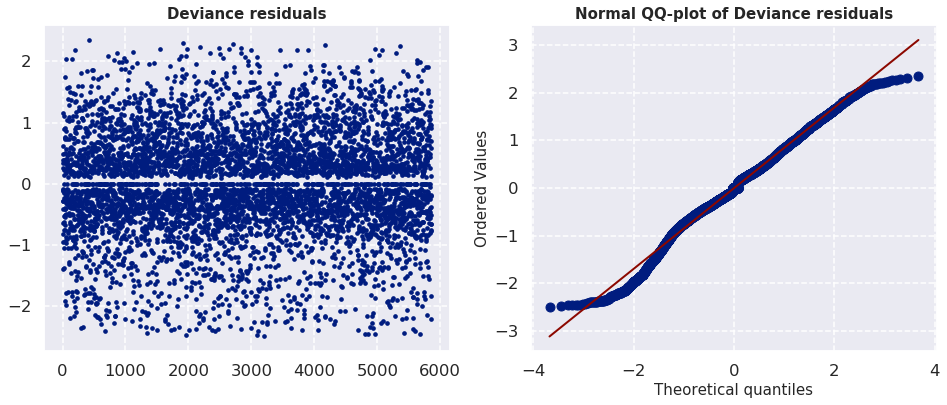

In [675]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(range(len(res.resid_dev)),res.resid_dev,s=10)
plt.title('Deviance residuals',size=15,weight="bold")
ax1 = fig.add_subplot()
plt.subplot(1,2,2)
scipy.stats.probplot(res.resid_dev, dist=scipy.stats.norm, plot=pylab)
ax1.get_lines()[0].set_markeredgecolor ('#6495ED')
ax1.get_lines()[0].set_markerfacecolor('#6495ED')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Normal QQ-plot of Deviance residuals", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
plt.savefig('After_selection.png',dpi=200,bbox_inches='tight')

In [693]:
finny=remove_test['loan_status']
finnx=remove_test.drop(['loan_status','index'],axis=1)

In [698]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(finnx)[:,1]
LR_Predict_bin = clf_LR.predict(finny)
LR_Accuracy = accuracy_score(finny,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)

Logistic regression accuracy is  0.826991980890633


In [700]:
print_confusion_matrix(finny,LR_Predict.round())
print_precision_recall_fscore(finny,LR_Predict.round())

Predicted     0     1
Gold                 
0.0        2390   540
1.0         474  2457
P: 0.8271585132618652 R: 0.8269900545306557 F1: 0.8269693694021039


Logistic regression accuracy is  0.826991980890633


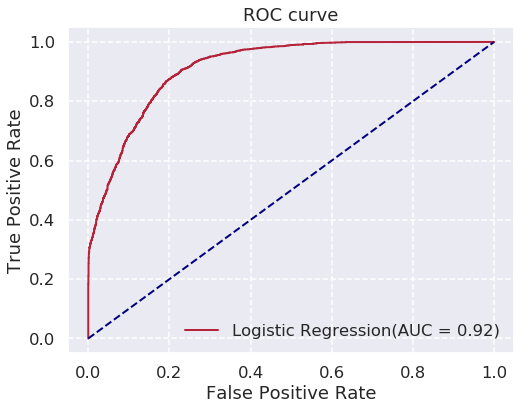

In [705]:
LR_Predict = clf_LR.predict_proba(finnx)[:,1]
LR_Predict_bin = clf_LR.predict(finnx)
LR_Accuracy = accuracy_score(finny,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(finny,LR_Predict,'Logistic Regression')
plt.show()

In [670]:
np.diag(res.pred_table()).sum()/len(remove_test)

0.8343286128646988

In [602]:
testset.to_csv('test.csv',index=False)